In [1]:
import numpy as np
import torch
import MAS_library as MASL #pylians
import redshift_space_library as RSL
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Per i grafici 3d indagare plotly

In [2]:
from kymatio.torch import HarmonicScattering3D
from kymatio.scattering3d.backend.torch_backend \
    import TorchBackend3D

In [3]:
data = np.loadtxt("MDR1_62_0.00005.dat", dtype=np.float32)

In [4]:
#Centro il cubo nello zero
x = data[:,0]-500.
y = data[:,1]-500.
z = data[:,2]-500.
vx = data[:,3]
vy = data[:,4]
vz = data[:,5]

Text(0.5, 0, 'z')

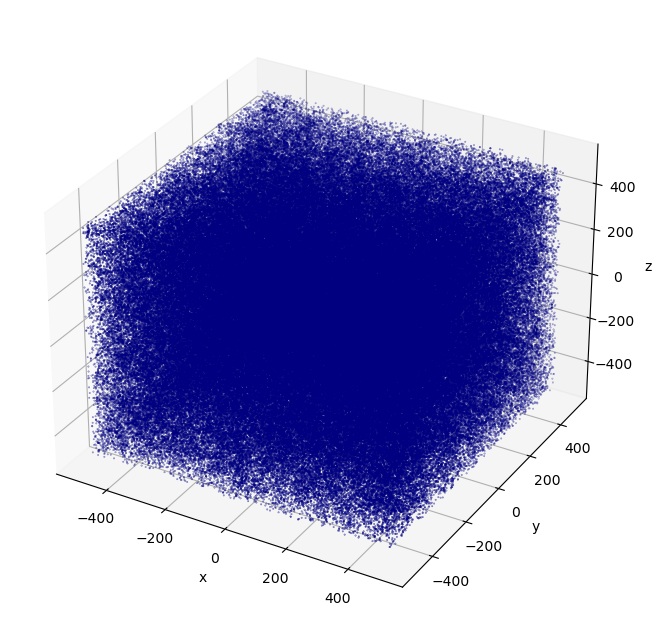

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'navy', s=0.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [6]:
pos = np.stack((x,y,z), -1)
vel = np.stack((vx,vy,vz), -1)

In [7]:
# density field parameters
grid    = 140 #the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0 #Mpc/h ; size of box      
MAS     = 'TSC'  #mass-assigment scheme    
verbose = True   #print information on progress

In [8]:
# define 3D density field
delta = np.zeros((grid,grid,grid), dtype=np.float32)

In [9]:
# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)


Using TSC mass assignment scheme
Time taken = 0.038 seconds



In [10]:
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0  

In [11]:
order_0 = np.zeros(1)
order_0[0] = np.power(np.abs(delta), 0.8).sum()/((1000/140)**3)
order_0

array([6634.375286])

In [12]:
# file1 = open("results_1.txt", "w+")

In [13]:
%%time

M, N, O = 140, 140, 140
J = 4
L = 4
S = HarmonicScattering3D(J=J, L=L, shape=(M, N, O), sigma_0=0.8, integral_powers=[0.8])
# file1.write(repr(HarmonicScattering3D(J=J, L=L, shape=(M, N, O), sigma_0=0.8, integral_powers=[0.8])))

CPU times: user 38.1 s, sys: 6.14 s, total: 44.2 s
Wall time: 39.2 s


In [14]:
%%time

# Calculate the scattering transform.
Sx = S.scattering(torch.from_numpy(delta))
# file1.read().scattering(torch.from_numpy(delta))
Sx.shape

CPU times: user 2min, sys: 146 ms, total: 2min
Wall time: 20.2 s


torch.Size([15, 5, 1])

Text(0.5, 1.0, 'Coefficienti di scattering')

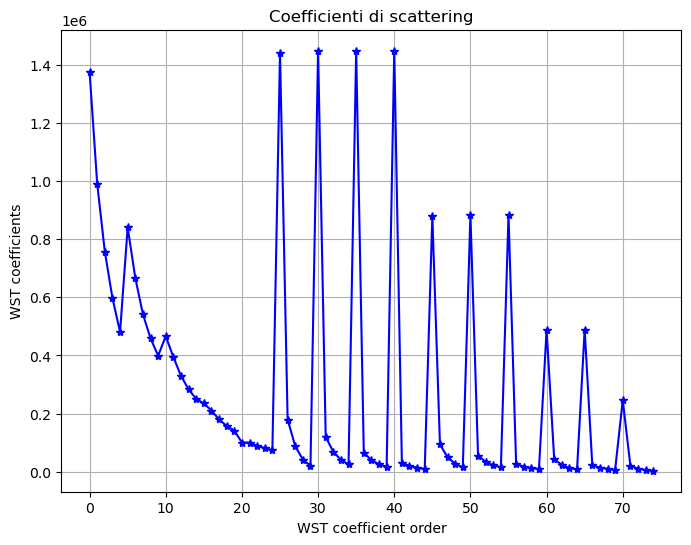

In [14]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten(Sx,start_dim=0), marker="*", color="Blue")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering")

In [15]:
first_order = []
second_order = []

for i in range(L+1):
    for j in range(J+1):
        first_order.append(Sx[j, i, 0].item())
    second_order.append(Sx[5:,i,0].numpy())

Text(0.5, 1.0, 'Coefficienti del primo ordine')

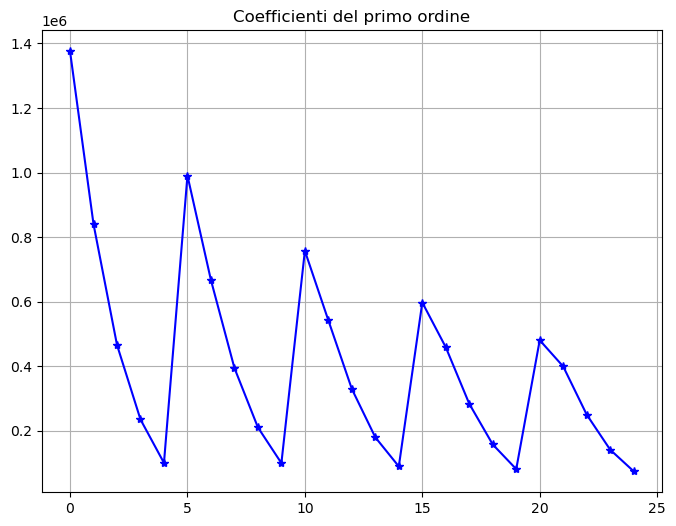

In [16]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(25), first_order, marker="*", color="Blue")
plt.grid()
plt.title("Coefficienti del primo ordine")

    I picchi sono in corrispondenza dei valori di L. Ogni valore di L produce 5 coefficienti di scattering, ognuno con un valore crescente di J. I minimi sono quindi i coefficienti che corrispondono a J=4.

Text(0.5, 1.0, 'Coefficienti del secondo ordine')

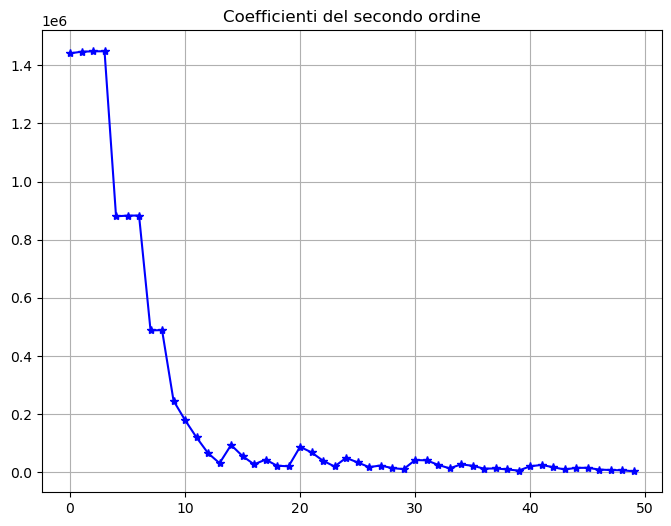

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(50), np.ravel(second_order),marker="*", color="Blue")
plt.grid()
plt.title("Coefficienti del secondo ordine")

    Ogni L produce 10 coefficienti del primo ordine: 4 corrispondono a J=0, 3 a J=1, 2 a J=2 e 1 per J=3. 

Text(0.5, 0, 'Coefficients')

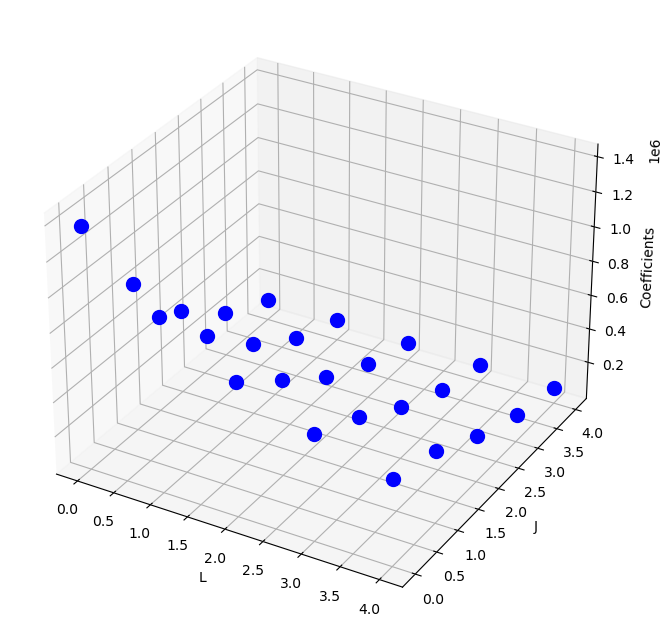

In [18]:
#primo ordine
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D( 0 , 0 , Sx[0, 0, 0].item() , color="blue" , s=100)
ax.scatter3D( 0 , 1 , Sx[1, 0, 0].item() , color="blue" , s=100)
ax.scatter3D( 0 , 2 , Sx[2, 0, 0].item() , color="blue" , s=100)
ax.scatter3D( 0 , 3 , Sx[3, 0, 0].item() , color="blue" , s=100)
ax.scatter3D( 0 , 4 , Sx[4, 0, 0].item() , color="blue" , s=100)
ax.scatter3D( 1 , 0 , Sx[0, 1, 0].item() , color="blue" , s=100)
ax.scatter3D( 1 , 1 , Sx[1, 1, 0].item() , color="blue" , s=100)
ax.scatter3D( 1 , 2 , Sx[2, 1, 0].item() , color="blue" , s=100)
ax.scatter3D( 1 , 3 , Sx[3, 1, 0].item() , color="blue" , s=100)
ax.scatter3D( 1 , 4 , Sx[4, 1, 0].item() , color="blue" , s=100)
ax.scatter3D( 2 , 0 , Sx[0, 2, 0].item() , color="blue" , s=100)
ax.scatter3D( 2 , 1 , Sx[1, 2, 0].item() , color="blue" , s=100)
ax.scatter3D( 2 , 2 , Sx[2, 2, 0].item() , color="blue" , s=100)
ax.scatter3D( 2 , 3 , Sx[3, 2, 0].item() , color="blue" , s=100)
ax.scatter3D( 2 , 4 , Sx[4, 2, 0].item() , color="blue" , s=100)
ax.scatter3D( 3 , 0 , Sx[0, 3, 0].item() , color="blue" , s=100)
ax.scatter3D( 3 , 1 , Sx[1, 3, 0].item() , color="blue" , s=100)
ax.scatter3D( 3 , 2 , Sx[2, 3, 0].item() , color="blue" , s=100)
ax.scatter3D( 3 , 3 , Sx[3, 3, 0].item() , color="blue" , s=100)
ax.scatter3D( 3 , 4 , Sx[4, 3, 0].item() , color="blue" , s=100)
ax.scatter3D( 4 , 0 , Sx[0, 4, 0].item() , color="blue" , s=100)
ax.scatter3D( 4 , 1 , Sx[1, 4, 0].item() , color="blue" , s=100)
ax.scatter3D( 4 , 2 , Sx[2, 4, 0].item() , color="blue" , s=100)
ax.scatter3D( 4 , 3 , Sx[3, 4, 0].item() , color="blue" , s=100)
ax.scatter3D( 4 , 4 , Sx[4, 4, 0].item() , color="blue" , s=100)

ax.set_xlabel('L')
ax.set_ylabel('J')
ax.set_zlabel('Coefficients')

Text(0.5, 0, 'Coefficients')

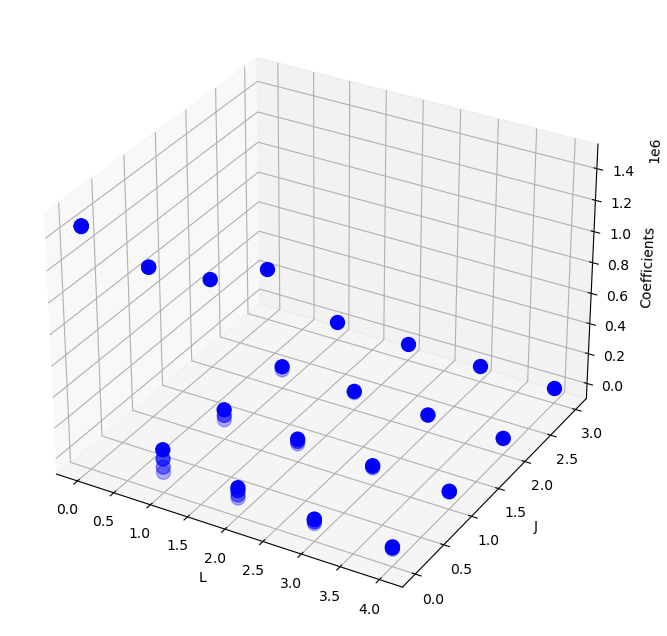

In [19]:
#second order
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
#L=0
ax.scatter3D( np.zeros(4) , np.zeros(4) , Sx[5:9, 0, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.zeros(3) , np.ones(3) , Sx[9:12, 0, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.zeros(2) , np.zeros(2)+2 , Sx[12:14, 0, 0].flatten() , color="blue" , s=100)
ax.scatter3D( 0 , 3 , Sx[14, 0, 0].item() , color="blue" , s=100)

#L=1
ax.scatter3D( np.ones(4) , np.zeros(4) , Sx[5:9, 1, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(3) , np.ones(3) , Sx[9:12, 1, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(2) , np.zeros(2)+2 , Sx[12:14, 1, 0].flatten() , color="blue" , s=100)
ax.scatter3D( 1 , 3 , Sx[14, 1, 0].item() , color="blue" , s=100)

#L=2
ax.scatter3D( np.ones(4)+1 , np.zeros(4) , Sx[5:9, 2, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(3)+1 , np.ones(3) , Sx[9:12, 2, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(2)+1 , np.zeros(2)+2 , Sx[12:14, 2, 0].flatten() , color="blue" , s=100)
ax.scatter3D( 2 , 3 , Sx[14, 2, 0].item() , color="blue" , s=100)

#L=3
ax.scatter3D( np.ones(4)+2 , np.zeros(4) , Sx[5:9, 3, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(3)+2 , np.ones(3) , Sx[9:12, 3, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(2)+2 , np.zeros(2)+2 , Sx[12:14, 3, 0].flatten() , color="blue" , s=100)
ax.scatter3D( 3 , 3 , Sx[14, 3, 0].item() , color="blue" , s=100)

#L=4
ax.scatter3D( np.ones(4)+3 , np.zeros(4) , Sx[5:9, 4, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(3)+3 , np.ones(3) , Sx[9:12, 4, 0].flatten() , color="blue" , s=100)
ax.scatter3D( np.ones(2)+3 , np.zeros(2)+2 , Sx[12:14, 4, 0].flatten() , color="blue" , s=100)
ax.scatter3D( 4 , 3 , Sx[14, 4, 0].item() , color="blue" , s=100)



ax.set_xlabel('L')
ax.set_ylabel('J')
ax.set_zlabel('Coefficients')

# ESEMPIO BANALE, distribuzione uniforme

In [20]:
# Generate a sample signal.
a = np.random.uniform(-500,500,size=len(x))
b = np.random.uniform(-500,500,size=len(x))
c = np.random.uniform(-500,500,size=len(x))
rand = np.stack((a,b,c), -1)
rand = rand.astype(np.float32)

In [27]:
# density field parameters
grid    = 140    #the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0 #Mpc/h ; size of box      
MAS     = 'TSC'  #mass-assigment scheme    
verbose = True   #print information on progress

In [28]:
# define 3D density field
delta_rnd = np.zeros((grid,grid,grid), dtype=np.float32)

In [29]:
# construct 3D density field
MASL.MA(rand, delta_rnd, BoxSize, MAS, verbose=verbose)


Using TSC mass assignment scheme
Time taken = 0.067 seconds



In [30]:
delta_rnd /= np.mean(delta_rnd, dtype=np.float64);  delta_rnd -= 1.0  

In [31]:
%%time 
# Calculate the scattering transform.
C = S.scattering(torch.from_numpy(delta_rnd))

CPU times: user 2min 27s, sys: 263 ms, total: 2min 27s
Wall time: 24.6 s


Text(0.5, 1.0, 'Coefficienti di scattering')

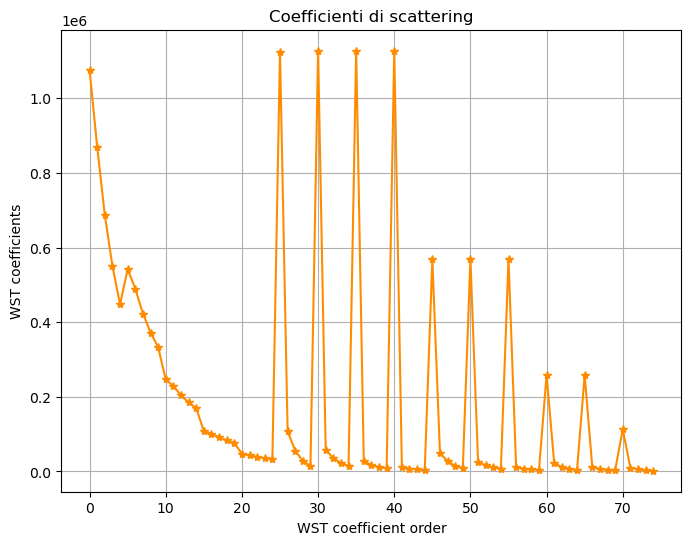

In [32]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten( C ) , marker="*", color="darkorange")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering")

In [33]:
first_order = []
second_order = []

for i in range(L+1):
    for j in range(J+1):
        first_order.append(C[j, i, 0].item())
    second_order.append(C[5:,i,0].numpy())

Text(0.5, 1.0, 'Coefficienti del primo ordine')

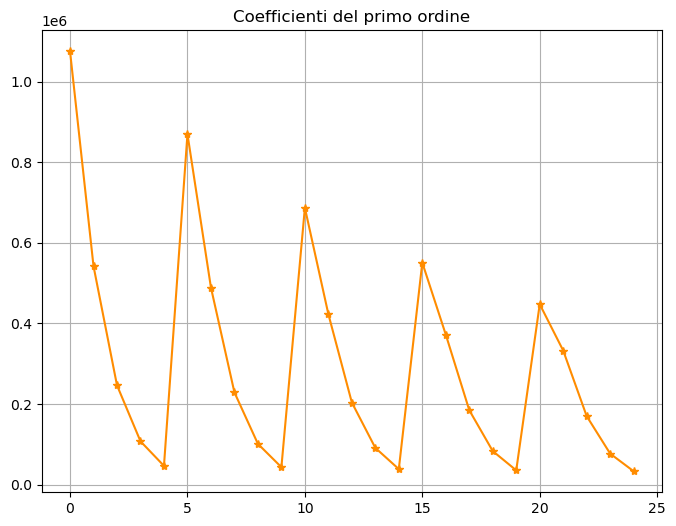

In [34]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(25), first_order, marker="*", color="Darkorange")
plt.grid()
plt.title("Coefficienti del primo ordine")

Text(0.5, 1.0, 'Coefficienti del secondo ordine')

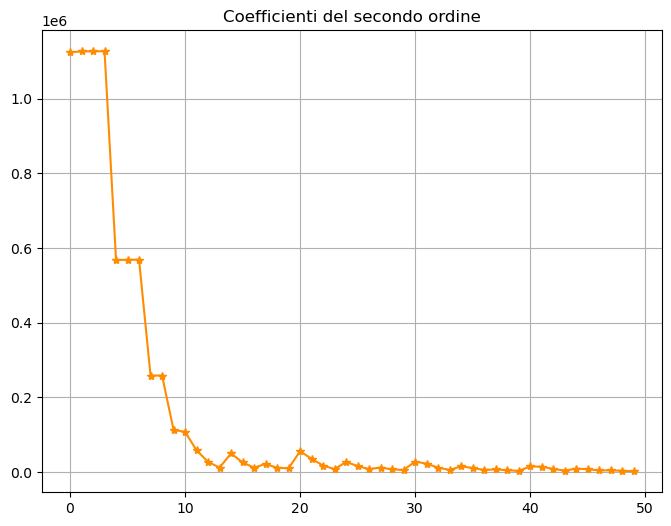

In [35]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(50), np.ravel(second_order),marker="*", color="darkorange")
plt.grid()
plt.title("Coefficienti del secondo ordine")

Text(0.5, 0, 'Coefficients')

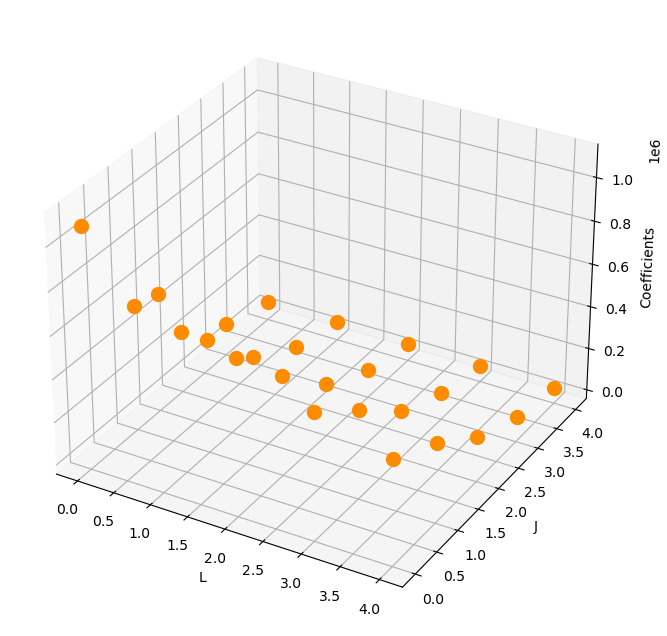

In [36]:
#primo ordine
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D( 0 , 0 , C[0, 0, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 0 , 1 , C[1, 0, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 0 , 2 , C[2, 0, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 0 , 3 , C[3, 0, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 0 , 4 , C[4, 0, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 1 , 0 , C[0, 1, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 1 , 1 , C[1, 1, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 1 , 2 , C[2, 1, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 1 , 3 , C[3, 1, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 1 , 4 , C[4, 1, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 2 , 0 , C[0, 2, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 2 , 1 , C[1, 2, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 2 , 2 , C[2, 2, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 2 , 3 , C[3, 2, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 2 , 4 , C[4, 2, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 3 , 0 , C[0, 3, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 3 , 1 , C[1, 3, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 3 , 2 , C[2, 3, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 3 , 3 , C[3, 3, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 3 , 4 , C[4, 3, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 4 , 0 , C[0, 4, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 4 , 1 , C[1, 4, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 4 , 2 , C[2, 4, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 4 , 3 , C[3, 4, 0].item() , color="darkorange" , s=100)
ax.scatter3D( 4 , 4 , C[4, 4, 0].item() , color="darkorange" , s=100)

ax.set_xlabel('L')
ax.set_ylabel('J')
ax.set_zlabel('Coefficients')

Text(0.5, 0, 'Coefficients')

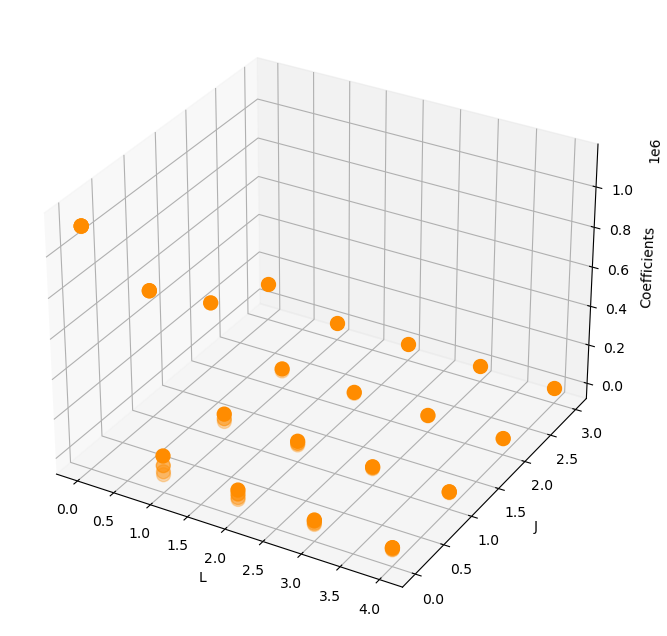

In [37]:
#second order
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
#L=0
ax.scatter3D( np.zeros(4) , np.zeros(4)   , C[5:9, 0, 0].flatten()   , color="darkorange" , s=100)
ax.scatter3D( np.zeros(3) , np.ones(3)    , C[9:12, 0, 0].flatten()  , color="darkorange" , s=100)
ax.scatter3D( np.zeros(2) , np.zeros(2)+2 , C[12:14, 0, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( 0           , 3             , C[14, 0, 0].item()       , color="darkorange" , s=100)

#L=1
ax.scatter3D( np.ones(4) , np.zeros(4) , C[5:9, 1, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(3) , np.ones(3) , C[9:12, 1, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(2) , np.zeros(2)+2 , C[12:14, 1, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( 1          , 3 , C[14, 1, 0].item() , color="darkorange" , s=100)

#L=2
ax.scatter3D( np.ones(4)+1 , np.zeros(4)   , C[5:9, 2, 0].flatten()   , color="darkorange" , s=100)
ax.scatter3D( np.ones(3)+1 , np.ones(3)    , C[9:12, 2, 0].flatten()  , color="darkorange" , s=100)
ax.scatter3D( np.ones(2)+1 , np.zeros(2)+2 , C[12:14, 2, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( 2            , 3             , C[14, 2, 0].item()       , color="darkorange" , s=100)

#L=3
ax.scatter3D( np.ones(4)+2 , np.zeros(4) , C[5:9, 3, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(3)+2 , np.ones(3) , C[9:12, 3, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(2)+2 , np.zeros(2)+2 , C[12:14, 3, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( 3 , 3 , C[14, 3, 0].item() , color="darkorange" , s=100)

#L=4
ax.scatter3D( np.ones(4)+3 , np.zeros(4) , C[5:9, 4, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(3)+3 , np.ones(3) , C[9:12, 4, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( np.ones(2)+3 , np.zeros(2)+2 , C[12:14, 4, 0].flatten() , color="darkorange" , s=100)
ax.scatter3D( 4 , 3 , C[14, 4, 0].item() , color="darkorange" , s=100)



ax.set_xlabel('L')
ax.set_ylabel('J')
ax.set_zlabel('Coefficients')

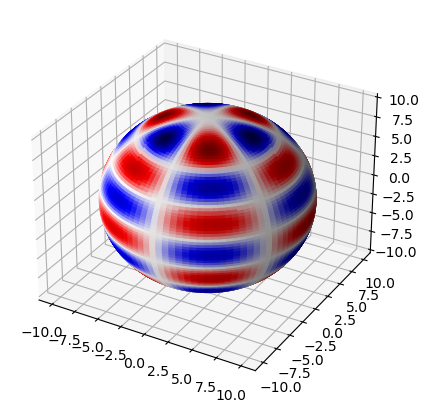

In [38]:
from scipy.special import sph_harm
import matplotlib.cm as cm


phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
r = 10

# The Cartesian coordinates of the unit sphere
x = r*np.sin(phi) * np.cos(theta)
y = r*np.sin(phi) * np.sin(theta)
z = r*np.cos(phi)


m, l = 3,9

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real #* 1/(2*np.pi)**1.5 * np.exp(-r**2/2*0.8**2) * r**l
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
#ax.set_axis_off()
plt.show()

## Kymatio, inizializzazione griglia

https://github.com/kymatio/kymatio/blob/main/kymatio/scattering3d/frontend/base_frontend.py

Di fatto la shape (M,N,O) viene utilizzata per creare i filtri con quelle dimensioni spaziali. Anche filtri sono definiti su griglie nello spazio con quelle dimensioni. Di seguito provo a plottare i filtri.

# Confronto col campione random

Text(0.5, 1.0, 'Coefficienti di scattering rinormalizzati per il campione random')

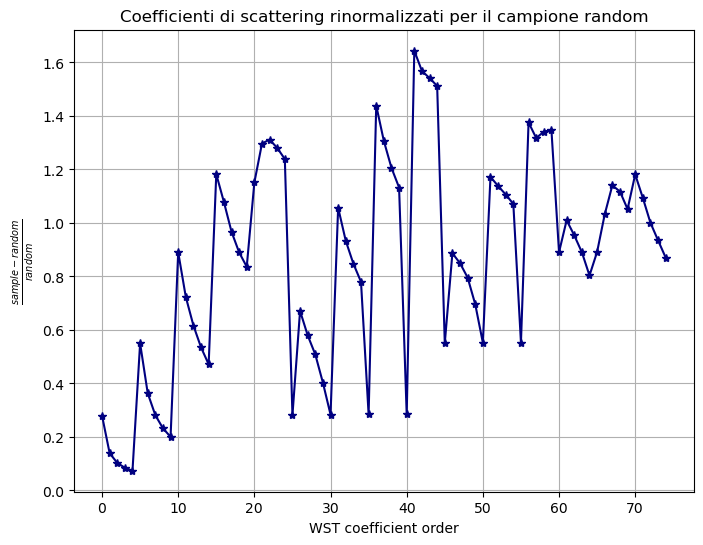

In [39]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten( (Sx-C)/C ) , marker="*", color="navy")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel(r"$\frac{sample-random}{random}$")
plt.title("Coefficienti di scattering rinormalizzati per il campione random")

# Simulating RSD

In [40]:
#Converting into spherical coordinates
import math as m
import random

def cart2sph(x,y,z):
    XsqPlusYsq = x**2 + y**2
    r = m.sqrt(XsqPlusYsq + z**2)  # r
    # theta
    elev= np.arccos(z/r)
    # phi
    az = np.sign(y)*np.arccos(x/np.sqrt(XsqPlusYsq))
    
    return r, elev, az

def cart2sphA(pts):
    return np.array([cart2sph(x,y,z) for x,y,z in pts])


def sph2cart(r, theta, phi):
    x = r * m.sin(theta) * m.cos(phi)
    y = r * m.sin(theta) * m.sin(phi)
    z = r * m.cos(theta)
    return x,y,z


def sph2cartA(pos):
    return np.array([sph2cart(x,y,z) for x,y,z in pos])

def radial_v(vel,pos_sph):
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    theta = pos_sph[:,1]
    phi = pos_sph[:,2]
    
    return vx * np.sin(theta) * np.cos(phi) + vy * np.sin(theta) * np.sin(phi) + vz * np.cos(theta)

In [41]:
pos_sph = cart2sphA(pos)

In [42]:
#Distorsioni
vr = radial_v(vel, pos_sph)
pos_sph[:,0] = pos_sph[:,0] + vr*(1+0.5)/70.00

In [43]:
pos_rsd = sph2cartA(pos_sph)
pos_rsd = pos_rsd.astype(np.float32)

In [48]:
# Build the density field
# density field parameters
grid    = 140    #the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0 #Mpc/h ; size of box      
MAS     = 'TSC'  #mass-assigment scheme    
verbose = True   #print information on progress

delta_rsd = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos_rsd, delta_rsd, BoxSize, MAS, verbose=verbose)

delta_rsd /= np.mean(delta_rsd, dtype=np.float64);  delta_rsd -= 1.0  


Using TSC mass assignment scheme
Time taken = 0.043 seconds



In [49]:
order_0 = np.power(np.abs(delta_rsd), 0.8).sum()/((1000/140)**3)
order_0

55970.88772811401

In [50]:
%%time
# Calculate the scattering transform.
RSD = S.scattering(torch.from_numpy(delta_rsd))

CPU times: user 2min 22s, sys: 272 ms, total: 2min 23s
Wall time: 23.9 s


Text(0.5, 1.0, 'Coefficienti di scattering')

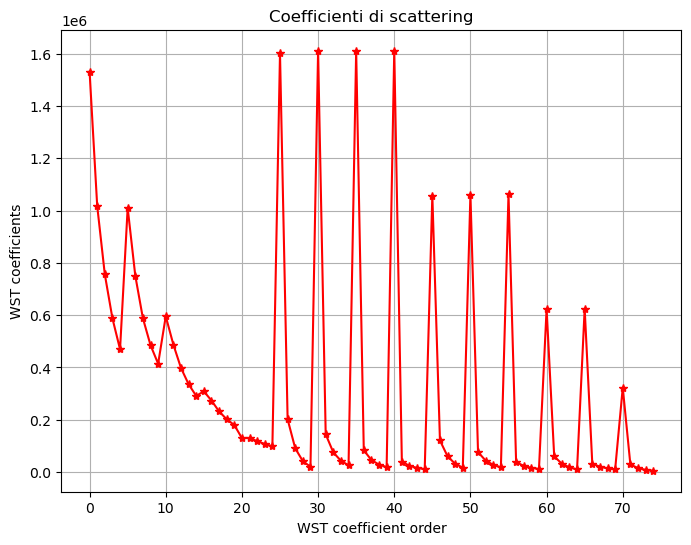

In [51]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten(RSD,start_dim=0), marker="*", color="red")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");

Text(0.5, 1.0, 'Coefficienti di scattering rinormalizzati per il campione random')

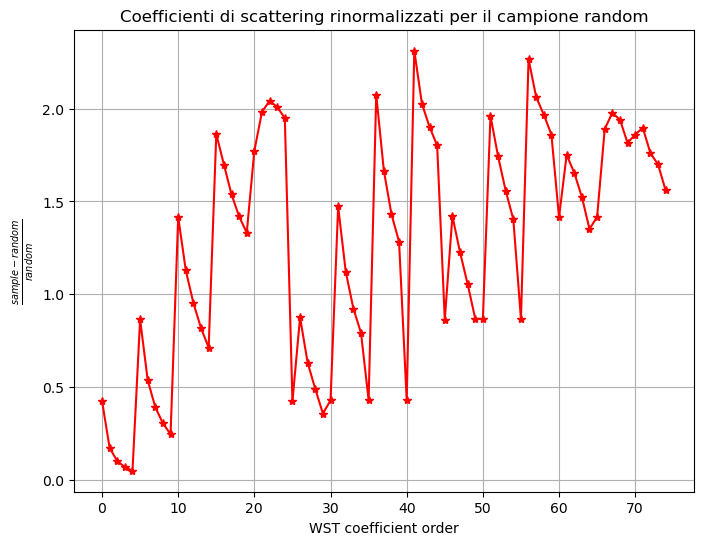

In [52]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten( (RSD-C)/C ) , marker="*", color="red")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel(r"$\frac{sample-random}{random}$")
plt.title("Coefficienti di scattering rinormalizzati per il campione random");

Text(0.5, 1.0, 'Rapporto tra i coefficienti con e senza RSD')

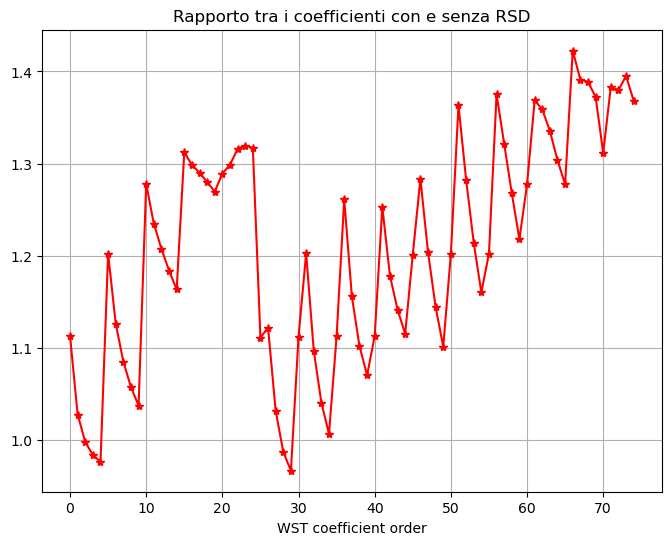

In [53]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(75), torch.flatten( RSD/Sx ) , marker="*", color="red")
plt.grid()
plt.xlabel("WST coefficient order")
plt.title("Rapporto tra i coefficienti con e senza RSD");

Text(0.5, 0, 'z')

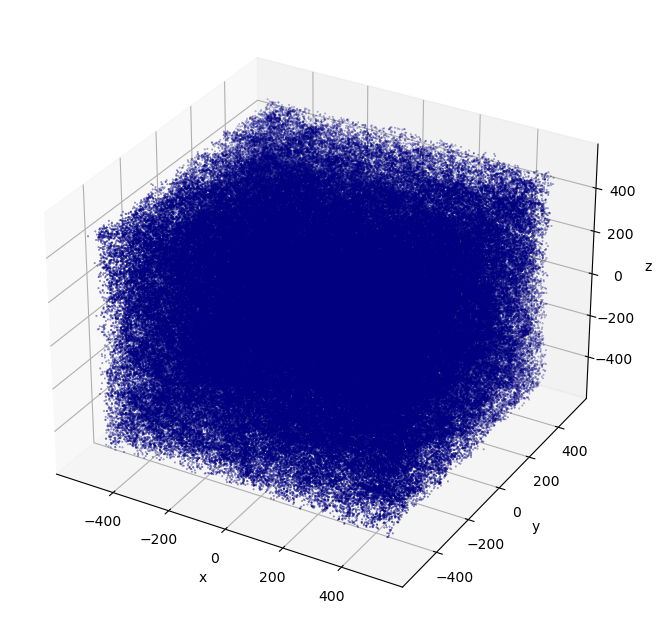

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos_rsd[:,0], pos_rsd[:,1], pos_rsd[:,2], zdir='z', c= 'navy', s=0.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");